In [1]:
require "pycall/import"
require "numpy"
require "matplotlib/iruby"
require "matplotlib/pyplot"

include PyCall::Import
pyimport "pandas", as: "pd"
np = Numpy
plt = Matplotlib::Pyplot
Matplotlib::IRuby.activate

[:inline, "module://matplotlib_rb.backend_inline"]

In [2]:
x_set = [1, 2, 3, 4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [3]:
f = ->(x) {
  if x_set.include?(x)
    x / 21.0
  else
    0
  end
}

#<Proc:0x0000000118101af8 (irb):0 (lambda)>

In [4]:
_X = [x_set, f]

[[1, 2, 3, 4, 5, 6], #<Proc:0x0000000118101af8 (irb):0 (lambda)>]

In [5]:
prob = x_set.map { |x_k| f.(x_k) }
x_set.zip(prob).to_h

{1=>0.047619047619047616, 2=>0.09523809523809523, 3=>0.14285714285714285, 4=>0.19047619047619047, 5=>0.23809523809523808, 6=>0.2857142857142857}

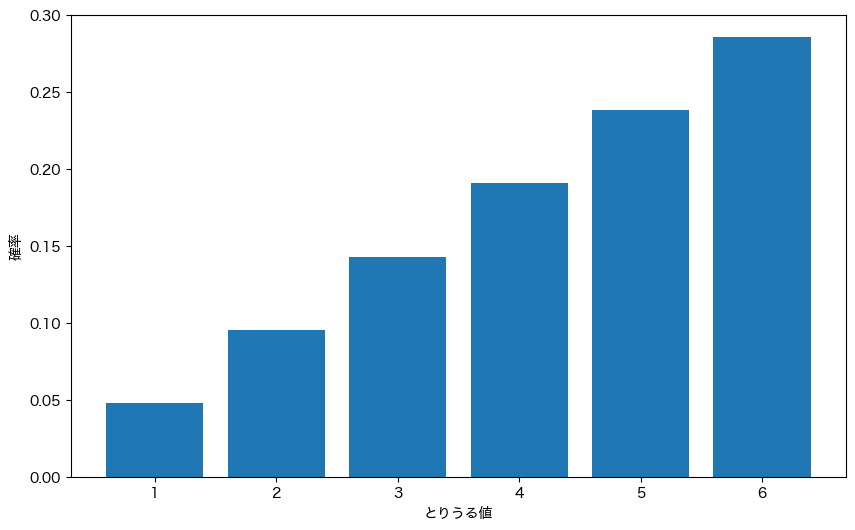

In [6]:
fig = plt.figure(figsize: [10, 6])
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')
plt.show

In [7]:
prob.all? { |p| p > 0 }

true

In [8]:
prob.sum

1.0

In [9]:
_F = ->(x) {
  x_set.filter_map { |x_k| x_k <= x && f.(x_k) }.sum
}

#<Proc:0x000000012121bf20 (irb):0 (lambda)>

In [10]:
_F.(3)

0.2857142857142857

In [11]:
y_set = x_set.map { |x_k| 2 * x_k + 3}
prob = x_set.map { |x_k| f.(x_k)}
y_set.zip(prob).to_h

{5=>0.047619047619047616, 7=>0.09523809523809523, 9=>0.14285714285714285, 11=>0.19047619047619047, 13=>0.23809523809523808, 15=>0.2857142857142857}

In [12]:
x_set.map { |x_k| x_k * f.(x_k) }.sum

4.333333333333333

In [13]:
sample = np.random.choice(x_set, 1e6.to_i, p: prob)
np.mean(sample)

4.329309

In [14]:
_E = ->(_X, g = ->(x) {x}) {
  x_set, f = _X
  x_set.map { |x_k| g.(x_k) * f.(x_k) }.sum
}

#<Proc:0x000000012125ea78 (irb):0 (lambda)>

In [15]:
_E.(_X)

4.333333333333333

In [16]:
_E.(_X, ->(x) { 2*x + 3 })

11.666666666666666

In [17]:
2 * _E.(_X) + 3

11.666666666666666

In [18]:
mean = _E.(_X)
x_set.map { |x_k| (x_k - mean)**2 * f.(x_k)}.sum

2.222222222222222

In [19]:
_V = ->(_X, g = ->(x) { x }) {
  x_set, f = _X
  mean = _E.(_X, g)
  x_set.map { |x_k| (g.(x_k)-mean)**2 * f.(x_k)  }.sum
}

#<Proc:0x0000000121d22b58 (irb):0 (lambda)>

In [20]:
_V.(_X)

2.222222222222222

In [21]:
_V.(_X, ->(x) { 2*x + 3 })

8.888888888888888

In [22]:
2**2 * _V.(_X)

8.888888888888888

In [23]:
x_set = (2...13).to_a
y_set = (1...7).to_a

[1, 2, 3, 4, 5, 6]

In [24]:
f_XY = ->(x, y) {
  if 1 <= y && y <= 6 and 1 <= x - y && x - y <= 6
    y * (x-y) / 441.0
  else
    0
  end
}

#<Proc:0x0000000121d86cc0 (irb):0 (lambda)>

In [25]:
_XY = [x_set, y_set, f_XY]

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5, 6], #<Proc:0x0000000121d86cc0 (irb):0 (lambda)>]

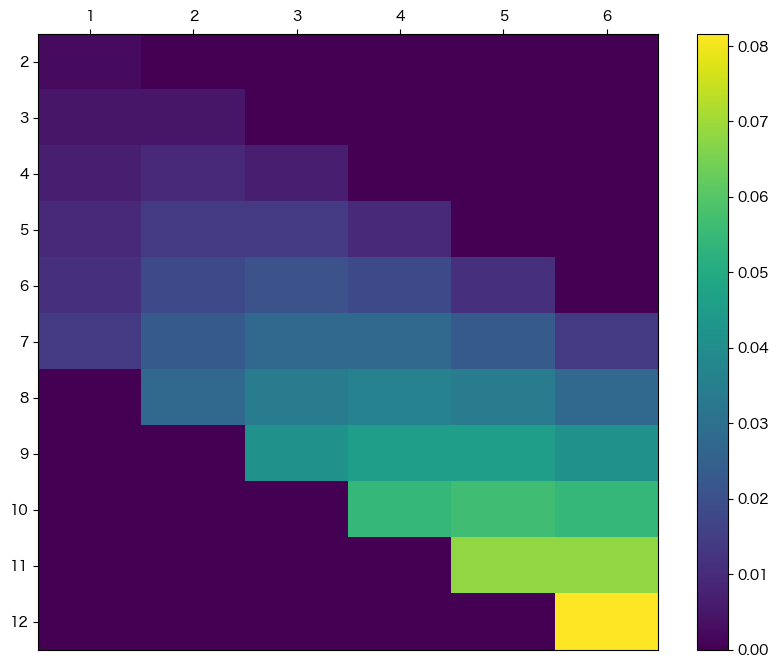

In [26]:
prob = np.array(x_set.map { |x_i| y_set.map { |y_j| f_XY.(x_i, y_j) } })
fig = plt.figure(figsize: [10, 8])
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor: false)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor: false)
ax.set_xticklabels(np.arange(1, 7), minor: false)
ax.set_yticklabels(np.arange(2, 13), minor: false)
ax.invert_yaxis
ax.xaxis.tick_top
fig.colorbar(c, ax: ax)
plt.show

In [27]:
np.all(prob >= 0)

true

In [28]:
np.sum(prob)

1.0

In [29]:
f_X = ->(x) {
  y_set.map { |y_k| f_XY.(x, y_k) }.sum
}

#<Proc:0x0000000122165878 (irb):0 (lambda)>

In [30]:
f_Y = ->(y) {
  x_set.map { |x_k| f_XY.(x_k, y) }.sum
}

#<Proc:0x000000012218fe20 (irb):0 (lambda)>

In [31]:
_X = [x_set, f_X]
_Y = [y_set, f_Y]

[[1, 2, 3, 4, 5, 6], #<Proc:0x000000012218fe20 (irb):0 (lambda)>]

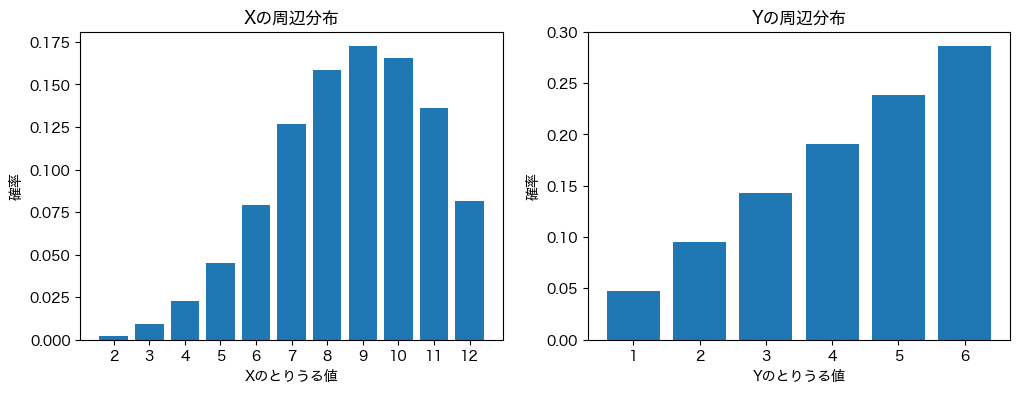

In [32]:
prob_x = np.array(x_set.map { |x_k| f_X.(x_k) })
prob_y = np.array(y_set.map { |y_k| f_Y.(y_k) })

fig = plt.figure(figsize: [12, 4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel('Xのとりうる値')
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel('Yのとりうる値')
ax2.set_ylabel('確率')

plt.show

In [33]:
y_set.flat_map { |y_j| x_set.map { |x_i| x_i * f_XY.(x_i, y_j) } }.sum

8.666666666666666

In [34]:
_E = ->(_XY, g) {
  x_set, y_set, f_XY = _XY
  y_set.flat_map { |y_j| x_set.map { |x_i| g.(x_i, y_j) * f_XY.(x_i, y_j) } }.sum
}

#<Proc:0x00000001223a5e58 (irb):0 (lambda)>

In [35]:
mean_X = _E.(_XY, ->(x, y) { x })

8.666666666666666

In [36]:
mean_Y = _E.(_XY, ->(x, y) { y })

4.333333333333333

In [37]:
a, b = 2, 3

[2, 3]

In [38]:
_E.(_XY, ->(x, y) { a*x + b*y })

30.333333333333332

In [39]:
a * mean_X + b * mean_Y

30.333333333333332

In [40]:
 y_set.flat_map { |y_j| x_set.map { |x_i| (x_i-mean_X)**2 * f_XY.(x_i, y_j) } }.sum

4.444444444444445

In [41]:
_V = ->(_XY, g) {
  x_set, y_set, f_XY = _XY
  mean = _E.(_XY, g)
   y_set.flat_map { |y_j| x_set.map { |x_i| (g.(x_i, y_j)-mean)**2 * f_XY.(x_i, y_j) } }.sum
}

#<Proc:0x000000012242ec80 (irb):0 (lambda)>

In [42]:
var_X = _V.(_XY, ->(x, y) { x })

4.444444444444445

In [43]:
var_Y = _V.(_XY, ->(x, y) { y })

2.2222222222222223

In [44]:
_Cov = ->(_XY) {
  x_set, y_set, f_XY = _XY
  mean_X = _E.(_XY, ->(x, y) { x })
  mean_Y = _E.(_XY, ->(x, y) { y })
  y_set.flat_map { |y_j| x_set.map { |x_i| (x_i-mean_X) * (y_j-mean_Y) * f_XY.(x_i, y_j) } }.sum
}

#<Proc:0x000000012244dd10 (irb):0 (lambda)>

In [45]:
cov_xy = _Cov.(_XY)

2.2222222222222223

In [46]:
_V.(_XY, ->(x, y) { a*x + b*y })

64.44444444444444

In [47]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444444